In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


df = pd.read_csv("data\preprocessed_exoplanet_data.csv")
print(df.head())


<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
C:\Users\gavin\AppData\Local\Temp\ipykernel_28972\1361083380.py:12: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv("data\preprocessed_exoplanet_data.csv")


   koi_period  koi_time0bk  koi_impact  koi_duration  koi_depth  koi_prad  \
0    9.488036   170.538750       0.146       2.95750      615.8      2.26   
1   54.418383   162.513840       0.586       4.50700      874.8      2.83   
2    1.736952   170.307565       1.276       2.40641     8079.2     33.46   
3    2.525592   171.595550       0.701       1.65450      603.3      2.75   
4   11.094321   171.201160       0.538       4.59450     1517.5      3.90   

   koi_teq  koi_insol  koi_model_snr  koi_steff  koi_slogg  koi_srad  \
0    793.0      93.59           35.8     5455.0      4.467     0.927   
1    443.0       9.11           25.8     5455.0      4.467     0.927   
2   1395.0     891.96          505.6     5805.0      4.564     0.791   
3   1406.0     926.16           40.9     6031.0      4.438     1.046   
4    835.0     114.81           66.5     6046.0      4.486     0.972   

          ra        dec  koi_kepmag  label  
0  291.93423  48.141651      15.347    1.0  
1  291.93423  

Shape of dataset: (7325, 16)

Missing values:
 koi_period       0
koi_time0bk      0
koi_impact       0
koi_duration     0
koi_depth        0
koi_prad         0
koi_teq          0
koi_insol        0
koi_model_snr    0
koi_steff        0
koi_slogg        0
koi_srad         0
ra               0
dec              0
koi_kepmag       0
label            0
dtype: int64


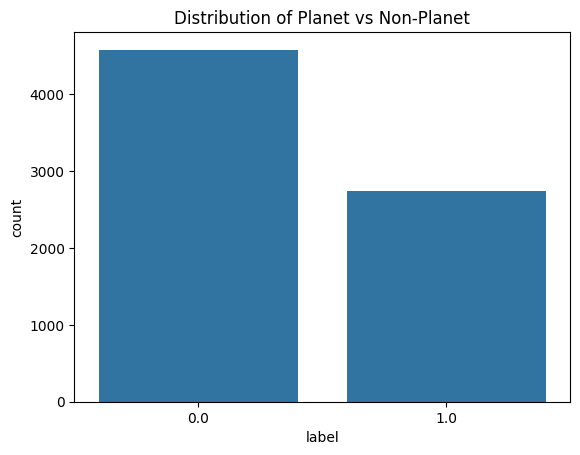

In [34]:
print("Shape of dataset:", df.shape)
print("\nMissing values:\n", df.isnull().sum()) #determines size
sns.countplot(x="label", data=df)
plt.title("Distribution of Planet vs Non-Planet")
plt.show() #bars of exoplanet type or not

In [37]:
X = df.drop("label", axis=1)
y = df["label"]

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

Feature matrix shape: (7325, 15)
Target vector shape: (7325,)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape[0]) #training sizes
print("Testing set size:", X_test.shape[0])

Training set size: 5860
Testing set size: 1465


In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
model = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train) #train model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [48]:
y_pred = model.predict(X_test_scaled) #predictions

Classification Report:

              precision    recall  f1-score   support

         0.0       0.93      0.77      0.84       916
         1.0       0.70      0.91      0.79       549

    accuracy                           0.82      1465
   macro avg       0.82      0.84      0.82      1465
weighted avg       0.85      0.82      0.82      1465



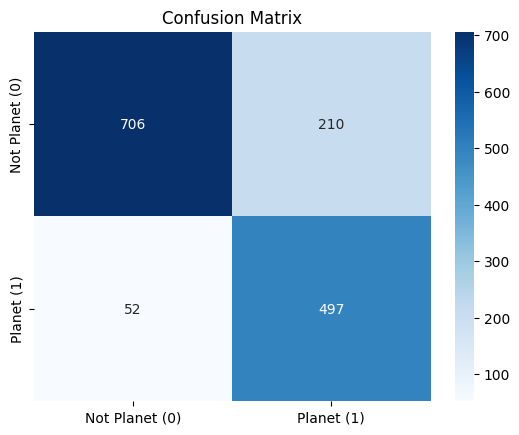

In [53]:
print("Classification Report:\n") #evaluation
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Planet (0)", "Planet (1)"], 
            yticklabels=["Not Planet (0)", "Planet (1)"])
plt.title("Confusion Matrix")
plt.show()

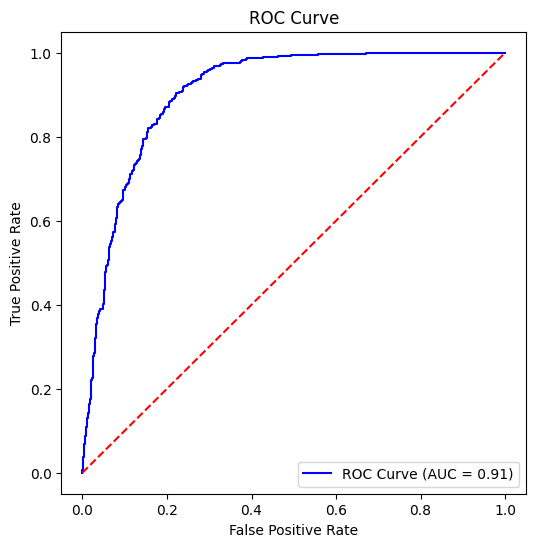

In [55]:
y_prob = model.predict_proba(X_test_scaled)[:, 1] # probability of class 1
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", label="ROC Curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0,1], [0,1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show() #graph the plot

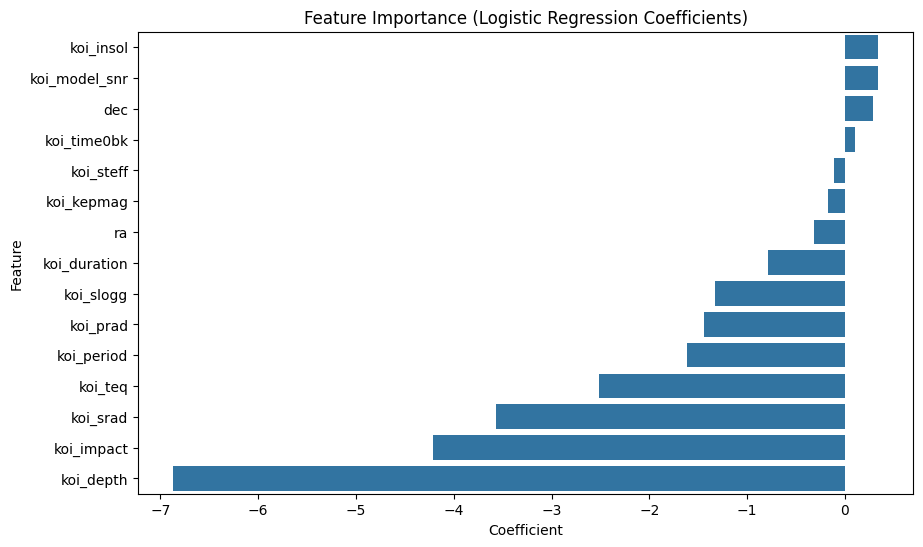

In [56]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Coefficient", y="Feature", data=coef_df)
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()